In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To create financial plots
import mplfinance as mpf 

In [103]:
csv = pd.read_csv('../Data/ADFFOODS.csv')
# print(type(csv))
csv.head()

,Unnamed: 0,close,datetime,exchange_code,high,low,open,stock_code,volume
0,0,69.00,2011-01-03 09:31:00,NSE,69.00,69.00,69.00,ADFFOO,100
1,1,69.95,2011-01-03 09:32:00,NSE,69.95,69.95,69.95,ADFFOO,100
2,2,68.20,2011-01-03 09:33:00,NSE,68.20,68.20,68.20,ADFFOO,591
3,3,68.35,2011-01-03 09:41:00,NSE,68.35,68.35,68.35,ADFFOO,50
4,4,68.25,2011-01-03 09:42:00,NSE,68.25,68.25,68.25,ADFFOO,100


In [104]:
df = csv.drop(columns=['Unnamed: 0'])
df.head()

,close,datetime,exchange_code,high,low,open,stock_code,volume
0,69.00,2011-01-03 09:31:00,NSE,69.00,69.00,69.00,ADFFOO,100
1,69.95,2011-01-03 09:32:00,NSE,69.95,69.95,69.95,ADFFOO,100
2,68.20,2011-01-03 09:33:00,NSE,68.20,68.20,68.20,ADFFOO,591
3,68.35,2011-01-03 09:41:00,NSE,68.35,68.35,68.35,ADFFOO,50
4,68.25,2011-01-03 09:42:00,NSE,68.25,68.25,68.25,ADFFOO,100


In [105]:
print(df.isnull().sum())

close            0
datetime         0
exchange_code    0
high             0
low              0
open             0
stock_code       0
volume           0
dtype: int64


In [106]:
print(df.dtypes)

close            float64
datetime          object
exchange_code     object
high             float64
low              float64
open             float64
stock_code        object
volume             int64
dtype: object


In [107]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [108]:
# print(df.dtypes)
print(df.describe())

               close                       datetime           high  \
count  671172.000000                         671172  671172.000000   
mean      359.690184  2019-11-14 21:27:45.520104704     359.916543   
min        37.050000            2011-01-03 09:31:00      37.050000   
25%       166.250000            2017-03-07 10:03:45     166.400000   
50%       247.650000            2020-05-18 12:15:00     247.900000   
75%       551.725000            2023-04-17 11:18:15     552.700000   
max      1182.200000            2025-02-19 15:29:00    1183.700000   
std       293.803304                            NaN     293.959810   

                 low           open        volume  
count  671172.000000  671172.000000  6.711720e+05  
mean      359.452210     359.683758  6.297495e+02  
min        37.050000      37.050000 -7.020000e+02  
25%       166.100000     166.250000  1.400000e+01  
50%       247.450000     247.650000  9.900000e+01  
75%       550.662500     551.512500  3.660000e+02  
max  

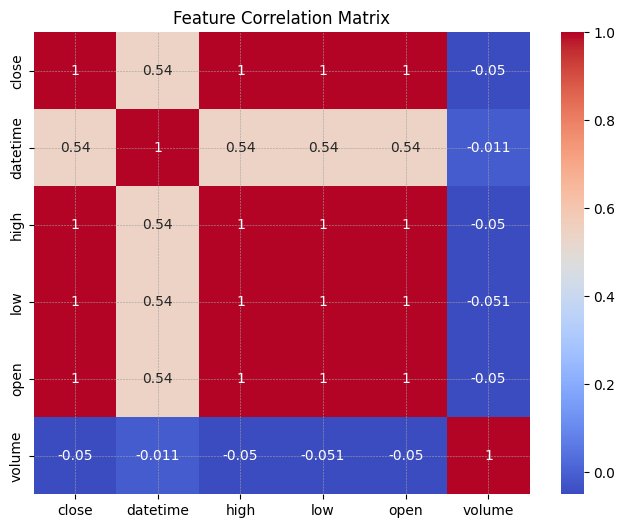

In [109]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['close',	'datetime',	'high',	'low',	'open',	'volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

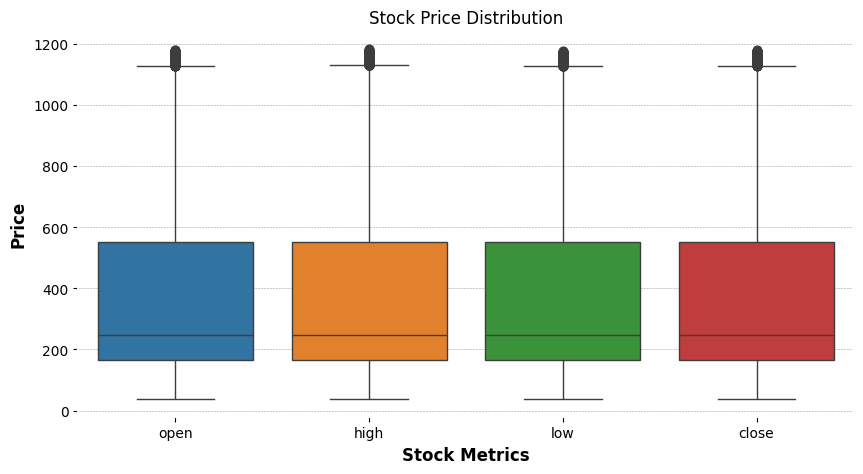

In [110]:
#  Create a Box Plot for Stock Prices
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['open', 'high', 'low', 'close']])
plt.title('Stock Price Distribution')
plt.ylabel('Price')
plt.xlabel('Stock Metrics')
plt.show()

In [111]:
# df.drop(['high', 'low', 'open'],axis=1, inplace=True)

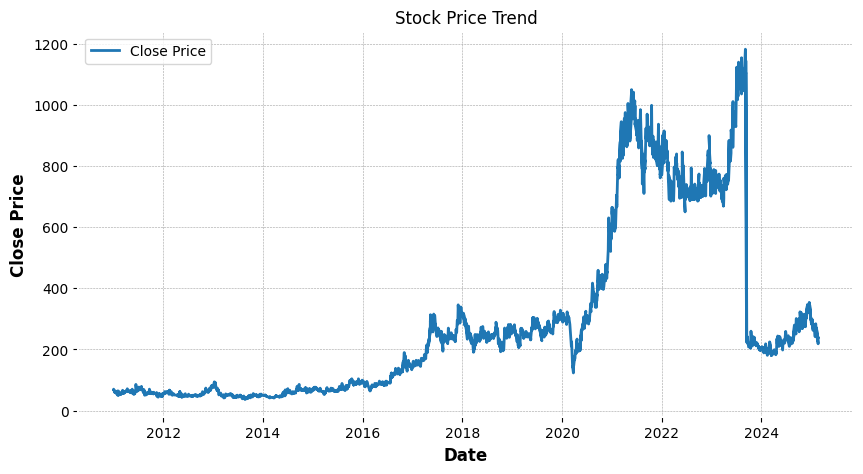

In [112]:
# Stock Price Over Time
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Trend')
plt.legend()
plt.show()

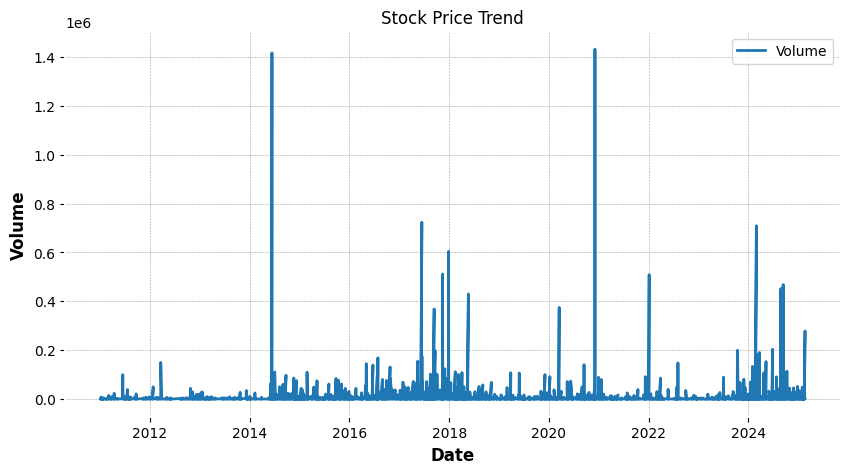

In [113]:
# Stock volume Over Time
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Price Trend')
plt.legend()
plt.show()

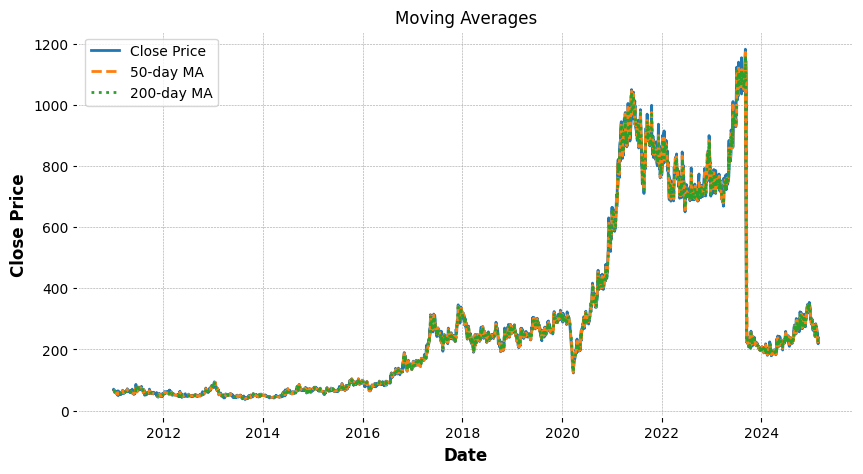

In [114]:
#  Moving Averages (Trend Detection)
df['MA50'] = df['close'].rolling(window=50).mean()
df['MA200'] = df['close'].rolling(window=200).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['close'], label='Close Price')
plt.plot(df['datetime'], df['MA50'], label='50-day MA', linestyle='dashed')
plt.plot(df['datetime'], df['MA200'], label='200-day MA', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Moving Averages')
plt.legend()
plt.show()


In [115]:
df['datetime'] = pd.to_datetime(df['datetime'])  # Convert to datetime
df.set_index('datetime', inplace=True)

In [116]:
df

,close,exchange_code,high,low,open,stock_code,volume,MA50,MA200
datetime,,,,,,,,,
2011-01-03 09:31:00,69.00,NSE,69.00,69.00,69.00,ADFFOO,100,NaN,NaN
2011-01-03 09:32:00,69.95,NSE,69.95,69.95,69.95,ADFFOO,100,NaN,NaN
2011-01-03 09:33:00,68.20,NSE,68.20,68.20,68.20,ADFFOO,591,NaN,NaN
2011-01-03 09:41:00,68.35,NSE,68.35,68.35,68.35,ADFFOO,50,NaN,NaN
2011-01-03 09:42:00,68.25,NSE,68.25,68.25,68.25,ADFFOO,100,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-02-19 15:25:00,240.55,NSE,240.60,240.00,240.00,ADFFOO,852,238.983,235.75350
2025-02-19 15:26:00,240.00,NSE,240.15,239.55,239.95,ADFFOO,2601,239.057,235.78900
2025-02-19 15:27:00,239.75,NSE,239.80,239.25,239.70,ADFFOO,537,239.122,235.82025


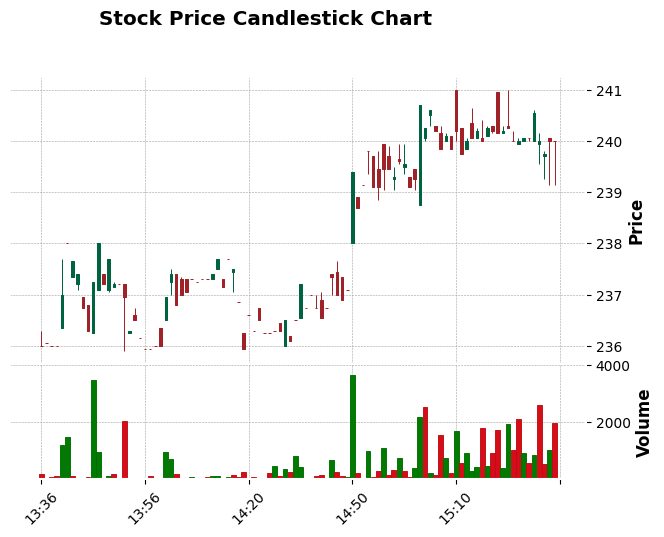

In [119]:
# Create a Stock Chart (Candlestick Chart)
mpf.plot(df.tail(100), type='candle', volume=True, style='charles', 
         title='Stock Price Candlestick Chart', ylabel='Price', ylabel_lower='Volume')
